In [1]:
# Importando las librerias básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Código usado para importar datos a google colab
from google.colab import files
files.upload()

**Exploración general de los datos**
---

---


In [24]:
# Cargando el archivo importado, viendo las dos primeras instancias
# sus dimensiones y el tipo de datos que contiene
data_raw=pd.read_csv("heart.csv")
print("Las primeras instancias del dataset son:")
print(data_raw.head(5).to_string())
print("\n Las dimensiones del dataset son", data_raw.shape)

Las primeras instancias del dataset son:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease
0   40   M           ATA        140          289          0     Normal    172              N      0.0       Up             0
1   49   F           NAP        160          180          0     Normal    156              N      1.0     Flat             1
2   37   M           ATA        130          283          0         ST     98              N      0.0       Up             0
3   48   F           ASY        138          214          0     Normal    108              Y      1.5     Flat             1
4   54   M           NAP        150          195          0     Normal    122              N      0.0       Up             0

 Las dimensiones del dataset son (918, 12)


In [25]:
print("Tipos de datos del dataset, de dimensiones", data_raw.shape)
data_raw.dtypes
# Se verifico que la data era balanceada

Tipos de datos del dataset, de dimensiones (918, 12)


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [26]:
# Separammos las variables numericas de las no numericas
num_cols = data_raw._get_numeric_data().columns

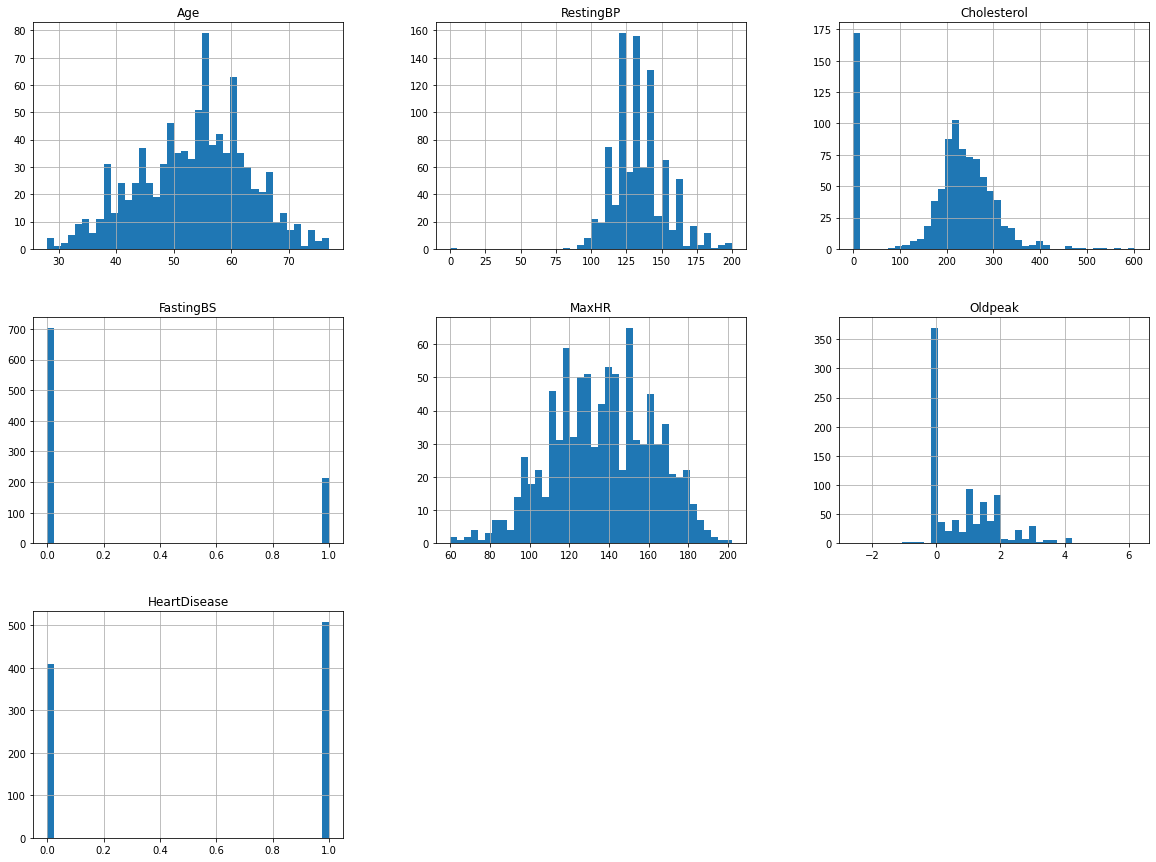

In [27]:
# Previsualización de variables numericas para ver distribuciones
# además obtenemos estadisticos de cada variable
data_raw[num_cols].hist(bins=40, figsize=(20,15))
plt.show()

In [28]:
print("Numerical Data" )
data_raw[num_cols].describe(include="all").T

Numerical Data


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [29]:
# para la data no numerica obtenemes la frecuencia de valores comunes.
cat_feat=["Female","Male","ASY","ATA","NAP","TA","LVH","NORMAL","ST","N","S","Down","Flat","Up"]
nn = data_raw.describe(include="O").columns
for i in nn:
  print(i ,"\n", data_raw[i].unique(), "\n")

Sex 
 ['M' 'F'] 

ChestPainType 
 ['ATA' 'NAP' 'ASY' 'TA'] 

RestingECG 
 ['Normal' 'ST' 'LVH'] 

ExerciseAngina 
 ['N' 'Y'] 

ST_Slope 
 ['Up' 'Flat' 'Down'] 



VARIABLES CATEGORICAS


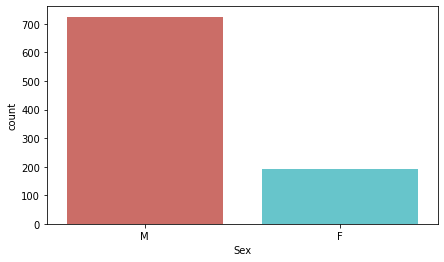

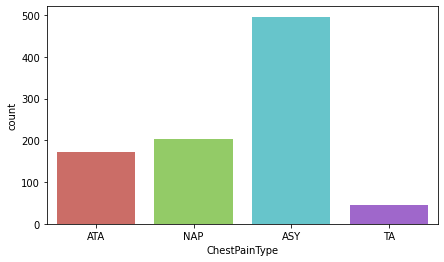

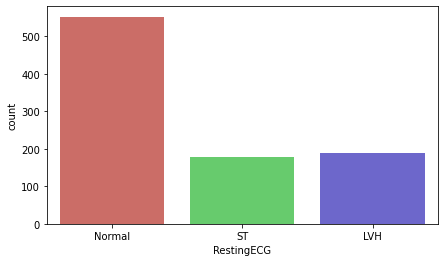

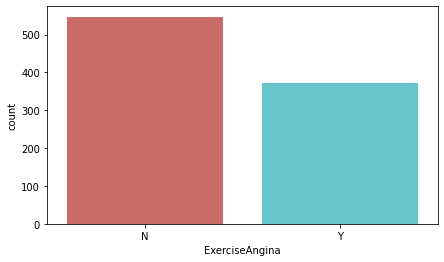

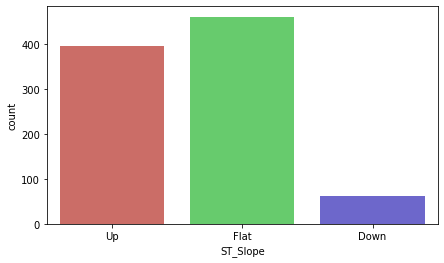

In [30]:
print("VARIABLES CATEGORICAS")
for i in nn:
  plt.figure(figsize=(7,4))
  sns.countplot(data_raw[i] ,palette="hls")
  plt.show()

**Exploración por grupos (Disease, No Disease)**
---

---

In [12]:
# Separamos la data en dos grupos disease y no disease y obtenemos valores estadisticos.
disease=data_raw[data_raw["HeartDisease"]==1]
notdisease=data_raw[data_raw["HeartDisease"]==0]

In [31]:
print("Group With Heart Disease Data".center(80," "))
disease.describe().T

                         Group With Heart Disease Data                          


,count,mean,std,min,25%,50%,75%,max
Age,508.0,55.899606,8.727056,31.0,51.0,57.0,62.00,77.0
RestingBP,508.0,134.185039,19.828685,0.0,120.0,132.0,145.00,200.0
Cholesterol,508.0,175.940945,126.391398,0.0,0.0,217.0,267.00,603.0
FastingBS,508.0,0.334646,0.472332,0.0,0.0,0.0,1.00,1.0
MaxHR,508.0,127.655512,23.386923,60.0,112.0,126.0,144.25,195.0
Oldpeak,508.0,1.274213,1.151872,-2.6,0.0,1.2,2.00,6.2
HeartDisease,508.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0


In [32]:
print("Group With No Disease Data".center(80," "))
notdisease.describe().T

                           Group With No Disease Data                           


,count,mean,std,min,25%,50%,75%,max
Age,410.0,50.551220,9.444915,28.0,43.00,51.0,57.00,76.0
RestingBP,410.0,130.180488,16.499585,80.0,120.00,130.0,140.00,190.0
Cholesterol,410.0,227.121951,74.634659,0.0,197.25,227.0,266.75,564.0
FastingBS,410.0,0.107317,0.309894,0.0,0.00,0.0,0.00,1.0
MaxHR,410.0,148.151220,23.288067,69.0,134.00,150.0,165.00,202.0
Oldpeak,410.0,0.408049,0.699709,-1.1,0.00,0.0,0.60,4.2
HeartDisease,410.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


                             Group With No Disease                               



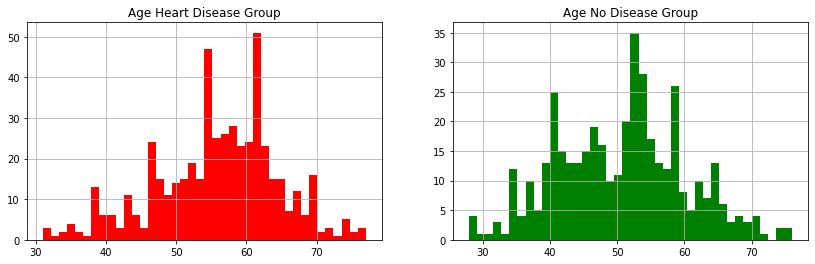

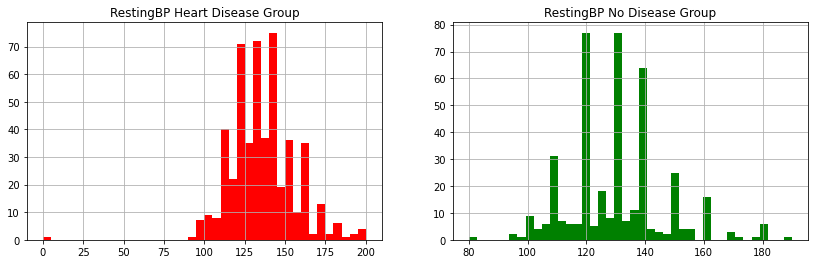

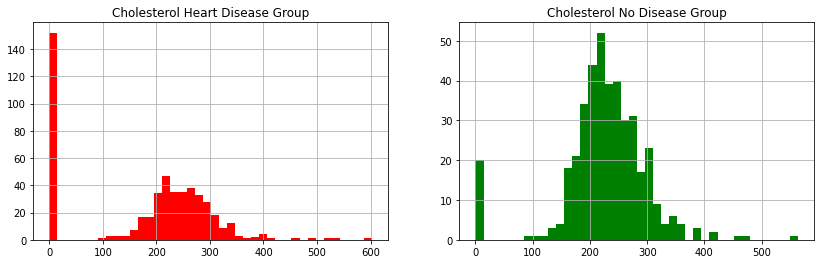

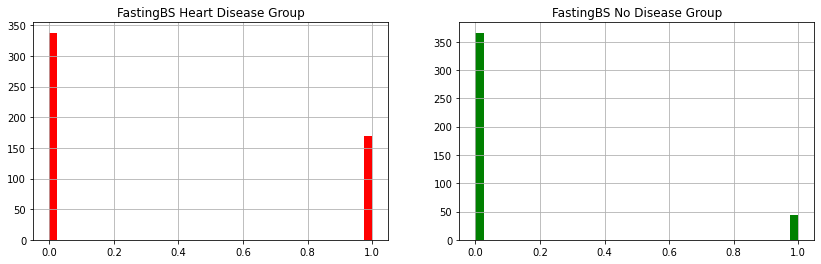

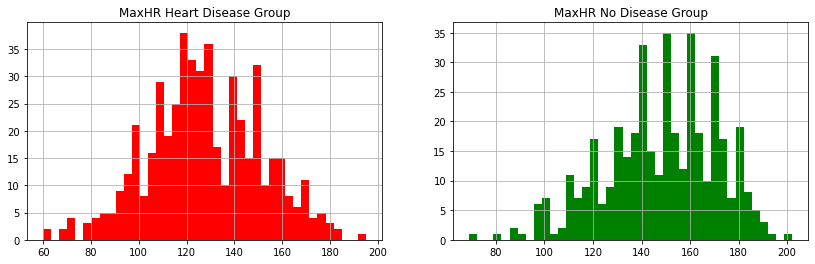

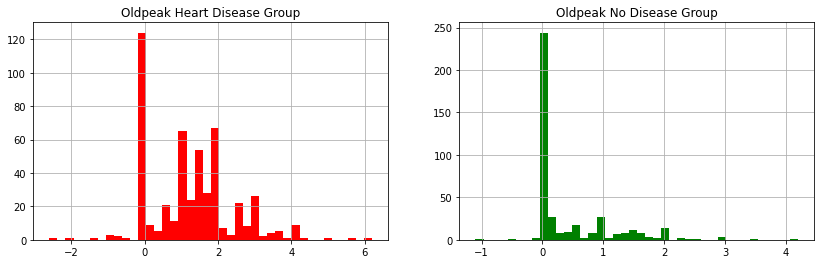

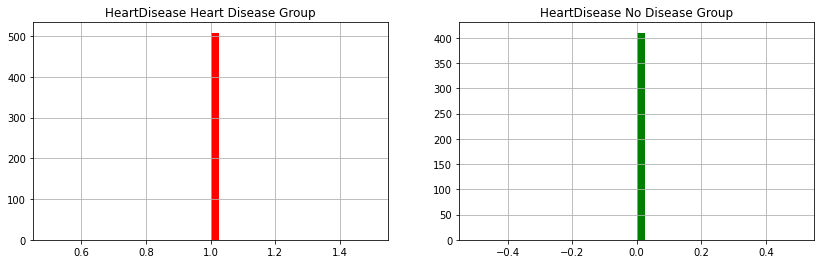

In [68]:
print("Group With No Disease".center(80," "), "\n")
for i in num_cols:
  plt.figure(figsize=(23,4))
  plt.subplot(121)
  plt.title(i+" Heart Disease Group")
  disease[i].hist(bins=40, figsize=(14,4),color="red")
  plt.subplot(122)
  notdisease[i].hist(bins=40, figsize=(14,4),color="green")
  plt.title(i+" No Disease Group")
  plt.show()

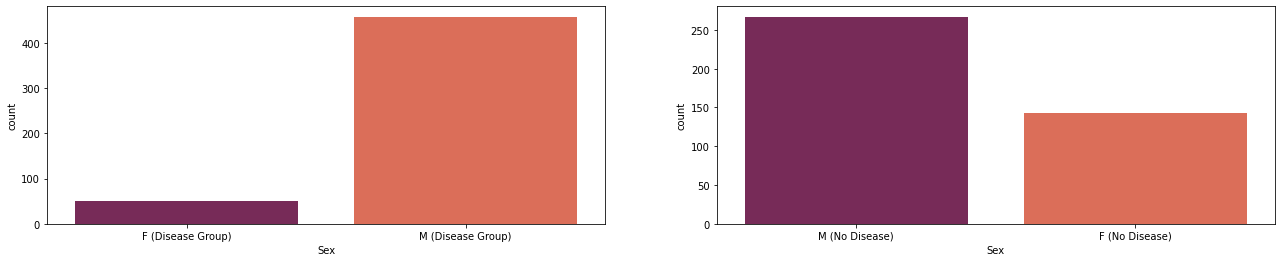

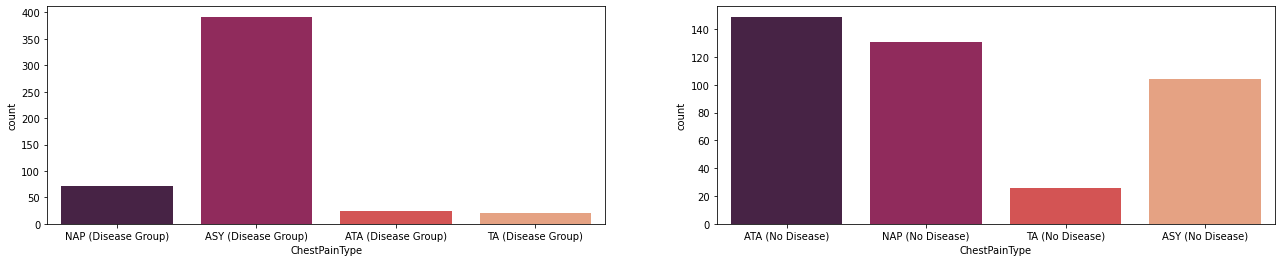

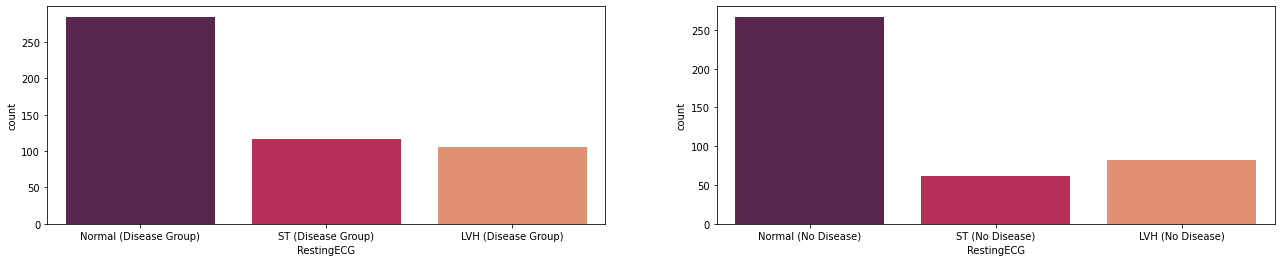

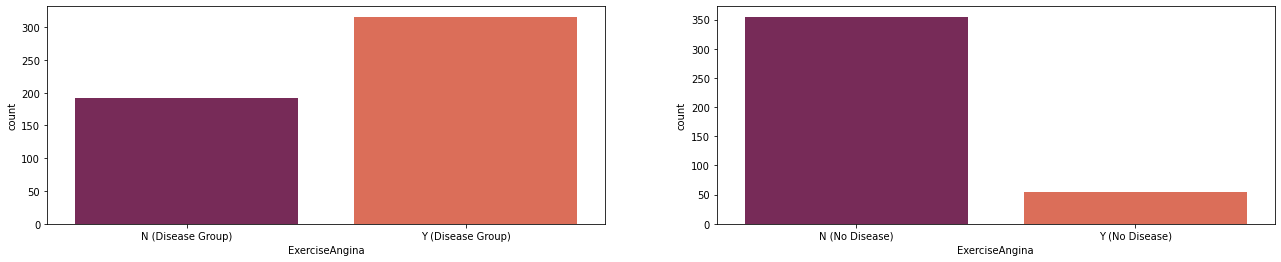

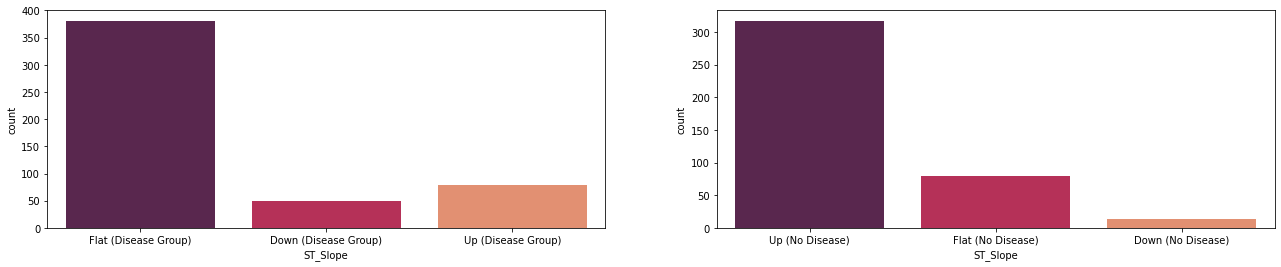

In [71]:
for i in nn:
  plt.figure(figsize=(22,4))
  plt.subplot(121)
  sns.countplot(disease[i]+" (Disease Group)" ,palette="rocket")
  plt.subplot(122)
  sns.countplot(notdisease[i]+" (No Disease)" ,palette="rocket")
  plt.show()

**OBSERVACIONES**
---

---



1.   Es un dataset que incluye 12 variables.
2.   5 variables son numericas 2 dicotómicas y 5 categóricas.
3.   El dataset incluye 918 instancias.
4.   Se encontró un pico de valore en "Cholesterol" que no corresponde con valores que pueden ser obtenidos, requiere limpieza en los datos.
5.   Se encontró un grupo de valores negativos en "Oldpeak", parecen carerer de sentido físico, requiere limpieza.
6.   Las variables categoricas tienen un total de 14 valores diferentes, por lo que se podria implementar one hot encoding sin preocuparse por un incremento considerable de variables.
7.   El dataset no contiene valores perdidos o NaN.

